# Expnet prediction

In [1]:
'''
/*
** Prediction.ipynb
** This file has been used to load best pretrained expnet model and predict on other images, like old images or
** real time images.
** @author: Shayan Ahmad Siddiqui
** @Date: 28th January, 2018
** @Copyright: Facial Expression Prediction, DL4CV project, Winter Sem, 2018
*/
'''

# Importing modules.

import numpy as np
import torch
from torch.autograd import Variable
import cv2
import utils.img_allign_expnet as iae
import utils.model_phase2_expnet as mpe
import os
import matplotlib.pyplot as plt

emo_list = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise" ]

In [2]:
def ReadImage(pathname, label=None, isFacenetData = False, imgAlligned = True): 
        if imgAlligned:
            img = cv2.imread(pathname)
        else:
            img = iae.img_align(pathname, label)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (96, 96), interpolation=cv2.INTER_LINEAR)
        img = np.transpose(img, (2, 0, 1))
        img = img.astype(np.float32) / 255.0
        I_ = torch.from_numpy(img).unsqueeze(0)
        if isFacenetData:
            if useCuda:
                I_ = I_.cuda()
        return I_

def show_image(x):
    img = x.squeeze()
    img = torch.transpose(img,0,1)
    img = torch.transpose(img,1,2)
    plt.imshow(img)
    plt.show()

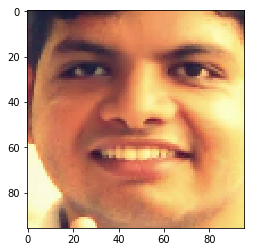

happy


In [3]:
model_p2 = mpe.ExpNet_p2(useCuda=True, gpuDevice=0)
model_p2.load_state_dict(torch.load(os.path.join('./model', 'expnet_p2.pt')))

folder = "data/predict_images"
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    if os.path.isfile(file_path):
        pass

x = ReadImage("data/predict_images/test.jpg", imgAlligned=False)
test_output = model_p2(Variable(x.cuda(), volatile=True))
max_val, idx = torch.max(test_output, 1)
show_image(x)
print(emo_list[idx.data.cpu().numpy()[0]])